In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [30]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [31]:
class_name = ["T-shirt/top","Trouser","Pull over","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [32]:
X_train = X_train.reshape((60000,28,28,1)) # reshaping adding 1 more channel 1
X_test = X_test.reshape((10000,28,28,1)) 

In [33]:
X_train = X_train.reshape((60000,28,28,1)) # reshaping adding 1 more channel 1
X_test = X_test.reshape((10000,28,28,1)) 
X_train_n=X_train/255.
X_test_n=X_test/255.

In [9]:
X_valid,X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train[:5000],y_train[5000:]
X_test=X_test_n

In [10]:
#FEATURE SCALING
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model =keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size =(3,3),strides = 1,padding = 'valid',activation ="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))#hidde layer 1
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [14]:
#compilation
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [15]:
model_history=model.fit(X_train,y_train,epochs=20,batch_size=64,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 34s 623us/sample - loss: 0.8755 - accuracy: 0.7029 - val_loss: 0.5964 - val_accuracy: 0.7848
Epoch 2/20
55000/55000 [==============================] - 34s 613us/sample - loss: 0.5388 - accuracy: 0.8046 - val_loss: 0.5042 - val_accuracy: 0.8196
Epoch 3/20
55000/55000 [==============================] - 26s 477us/sample - loss: 0.4782 - accuracy: 0.8278 - val_loss: 0.4865 - val_accuracy: 0.8252
Epoch 4/20
55000/55000 [==============================] - 26s 471us/sample - loss: 0.4421 - accuracy: 0.8422 - val_loss: 0.4206 - val_accuracy: 0.8538
Epoch 5/20
55000/55000 [==============================] - 26s 472us/sample - loss: 0.4161 - accuracy: 0.8519 - val_loss: 0.4770 - val_accuracy: 0.8192
Epoch 6/20
55000/55000 [==============================] - 28s 515us/sample - loss: 0.3962 - accuracy: 0.8587 - val_loss: 0.4258 - val_accuracy: 0.8514
Epoch 7/20
55000/55000 [=====================

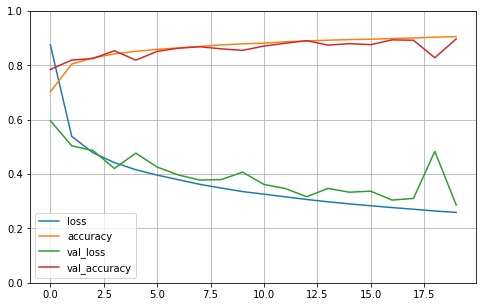

In [16]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.30048118320703504, 0.8895]

In [18]:
X_new=X_test[:3]

In [19]:
X_new

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [20]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [21]:
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pull over', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


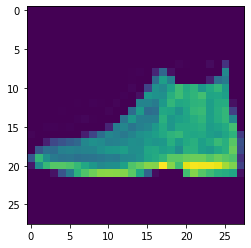

In [23]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [25]:
model_a =keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32,kernel_size =(3,3),strides = 1,padding = 'valid',activation ="relu",input_shape=(28,28,1)))
model_a.add(keras.layers.MaxPooling2D((2,2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))#hidde layer 1
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b =keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=32,kernel_size =(3,3),strides = 1,padding = 'valid',activation ="relu",input_shape=(28,28,1)))

model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))#hidde layer 1
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [26]:
#compilation
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#compilation
model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [27]:
model_a.summary()
model_b.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [28]:
model_history_a=model_a.fit(X_train,y_train,epochs=2,batch_size=64,validation_data=(X_valid,y_valid))
model_history_b=model_b.fit(X_train,y_train,epochs=2,batch_size=64,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 32s 576us/sample - loss: 0.9100 - accuracy: 0.6971 - val_loss: 0.5835 - val_accuracy: 0.7858
Epoch 2/2
55000/55000 [==============================] - 27s 492us/sample - loss: 0.5369 - accuracy: 0.8060 - val_loss: 0.4925 - val_accuracy: 0.8226
Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 57s 1ms/sample - loss: 0.7363 - accuracy: 0.7467 - val_loss: 0.5166 - val_accuracy: 0.8144
Epoch 2/2
55000/55000 [==============================] - 82s 1ms/sample - loss: 0.4892 - accuracy: 0.8245 - val_loss: 0.4650 - val_accuracy: 0.8332


In [29]:
X_train = X_train.reshape((60000,28,28,1)) # reshaping adding 1 more channel 1
X_test = X_test.reshape((10000,28,28,1)) 
X_train_n=X_train/255.
X_test_n=X_test/255.

ValueError: cannot reshape array of size 43120000 into shape (60000,28,28,1)

In [34]:
X_valid,X_train = X_train_n[:6000],X_train_n[6000:]
y_valid,y_train = y_train[:6000],y_train[6000:]
X_test=X_test_n

In [35]:
model =keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size =(3,3),strides = 1,padding = 'valid',activation ="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation="relu"))#hidde layer 1
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [36]:
model2 =keras.models.Sequential()
model2.add(keras.layers.Conv2D(filters=64,kernel_size =(3,3),strides = 1,padding = 'valid',activation ="relu",input_shape=(28,28,1)))
model2.add(keras.layers.MaxPooling2D((2,2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(300, activation="relu"))#hidde layer 1
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
#compilation
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#compilation
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [38]:
model_history=model.fit(X_train,y_train,epochs=60,batch_size=64,validation_data=(X_valid,y_valid))
model_history=model2.fit(X_train,y_train,epochs=60,batch_size=64,validation_data=(X_valid,y_valid))

Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 40s 733us/sample - loss: 0.8761 - accuracy: 0.7032 - val_loss: 0.7065 - val_accuracy: 0.7392
Epoch 2/60
54000/54000 [==============================] - 37s 692us/sample - loss: 0.5403 - accuracy: 0.8049 - val_loss: 0.4847 - val_accuracy: 0.8255
Epoch 3/60
54000/54000 [==============================] - 38s 696us/sample - loss: 0.4809 - accuracy: 0.8254 - val_loss: 0.4478 - val_accuracy: 0.8435
Epoch 4/60
54000/54000 [==============================] - 38s 712us/sample - loss: 0.4481 - accuracy: 0.8401 - val_loss: 0.4237 - val_accuracy: 0.8495
Epoch 5/60
54000/54000 [==============================] - 38s 704us/sample - loss: 0.4220 - accuracy: 0.8482 - val_loss: 0.4085 - val_accuracy: 0.8540
Epoch 6/60
54000/54000 [==============================] - 38s 711us/sample - loss: 0.4026 - accuracy: 0.8554 - val_loss: 0.4001 - val_accuracy: 0.8615
Epoch 7/60
54000/54000 [=====================

KeyboardInterrupt: 